In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
class SteepestDescentNumericalLr:
    def __init__(self): ...
    
    def optimize(self, 
                 func,  
                 x0, 
                 lr=0.01,
                 h=1e-5,
                 max_iterations=1000,
                 stop_value=None,
                 lr_schedule_type='fixed'):
        
        x = np.array(x0, dtype=float)
        trayectory = []
        lr_history = []
        initial_lr = lr
        lr_history.append(initial_lr)
        
        for i in range(max_iterations):
            f_val = func(x)
            trayectory.append(f_val)

            if stop_value and f_val <= stop_value:
                    break

            grad = self.numerical_gradient(func, x, h=h)

            lr = self.get_learning_rate(
                schedule_type=lr_schedule_type,
                initial_lr=initial_lr,
                iteration=i,
                max_iterations=max_iterations,
                func=func,
                x=x,
                grad=grad
            )
            lr_history.append(lr)

            x = x - lr * grad

        return x, trayectory, lr_history

    def numerical_gradient(self, f, x, h):
        n = len(x)
        grad = np.zeros(n)
        
        for i in range(n):
            x_plus = x.copy()
            x_minus = x.copy()
            
            x_plus[i] += h
            x_minus[i] -= h

            grad[i] = (f(x_plus) - f(x_minus)) / (2*h)

        return grad
    
    def get_learning_rate(self, schedule_type, initial_lr, iteration, max_iterations, func, x, grad):
        if schedule_type == 'fixed':
            return initial_lr
        elif schedule_type == 'linear_decreasing':
            return self.linear_decreasing_lr(initial_lr, iteration, max_iterations)
        elif schedule_type == 'adaptive':
            return self.adaptive_lr(initial_lr, iteration)
        elif schedule_type == 'intelligent':
            return self.intelligent_lr(func, x, grad, initial_lr)
        else:
            raise ValueError(f"Estrategia de lr desconocida: {schedule_type}")

    def linear_decreasing_lr(self, initial_lr, iteration, max_iterations):
        return initial_lr * (1 - iteration / max_iterations)
    
    def adaptive_lr(self, initial_lr, iteration):
        return initial_lr / (1 + 0.1 * np.sqrt(iteration + 1))

    def intelligent_lr(self, func, x, grad, initial_lr):
        alpha = initial_lr
        c1 = 1e-4
        rho = 0.5
        max_backtracks = 50
        min_alpha = 1e-10
        
        f_x = func(x)
        grad_norm_sq = np.dot(grad, grad)
        
        if grad_norm_sq < 1e-12:
            return min_alpha
        
        directional_derivative = -grad_norm_sq
        backtrack_count = 0
        
        while backtrack_count < max_backtracks and alpha > min_alpha:
            x_new = x - alpha * grad
            f_new = func(x_new)

            if f_new <= f_x + c1 * alpha * directional_derivative:
                break
                
            alpha *= rho
            backtrack_count += 1
        
        return max(alpha, min_alpha)
    
    def plot(self, trayectory, title="Descenso Más Pronunciado"):
        plt.figure(figsize=(8, 6))
        plt.plot(trayectory)
        plt.title(title)
        plt.xlabel('Iteraciones')
        plt.ylabel('Valor de la función')
        plt.grid(True)
        plt.show()

In [59]:
def translated_sphere(x):
    c = np.ones(len(x))
    return np.sum((x - c)**2)

def rosenbrock(x):
    result = 0
    for i in range(len(x) - 1):
        result += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return result

def perm(x):
    B = 1
    result = 0
    for k in range(1, len(x) + 1):
        inner_sum = 0
        for i in range(1, len(x) + 1):
            inner_sum += (i + B) * (x[i-1]**k - (1/i)**k)
        result += inner_sum**2
    return result  

In [60]:
n = 5
x0 = [0.5] * n
sd_algorithm = SteepestDescentNumericalLr()

======= OPTIMIZACIÓN DE LA FUNCIÓN ESFERA TRASLADADA =======
TAMAÑO DE PASO FIJO
Valor óptimo encontrado: [0.95705033 0.95705033 0.95705033 0.95705033 0.95705033]
Valor de la función en el óptimo: 0.009223372036990496
Número de iteraciones: 12
TAMAÑO DE PASO DECRECIENTE LINEALMENTE
Valor óptimo encontrado: [1.04393199 1.04393199 1.04393199 1.04393199 1.04393199]
Valor de la función en el óptimo: 0.009650096536028559
Número de iteraciones: 50
TAMAÑO DE PASO ADAPTATIVO
Valor óptimo encontrado: [1.03235525 1.03235525 1.03235525 1.03235525 1.03235525]
Valor de la función en el óptimo: 0.005234311729519143
Número de iteraciones: 8
TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)
Valor óptimo encontrado: [0.96875 0.96875 0.96875 0.96875 0.96875]
Valor de la función en el óptimo: 0.004882812500531138
Número de iteraciones: 3
Gráfica Descenso de la función:


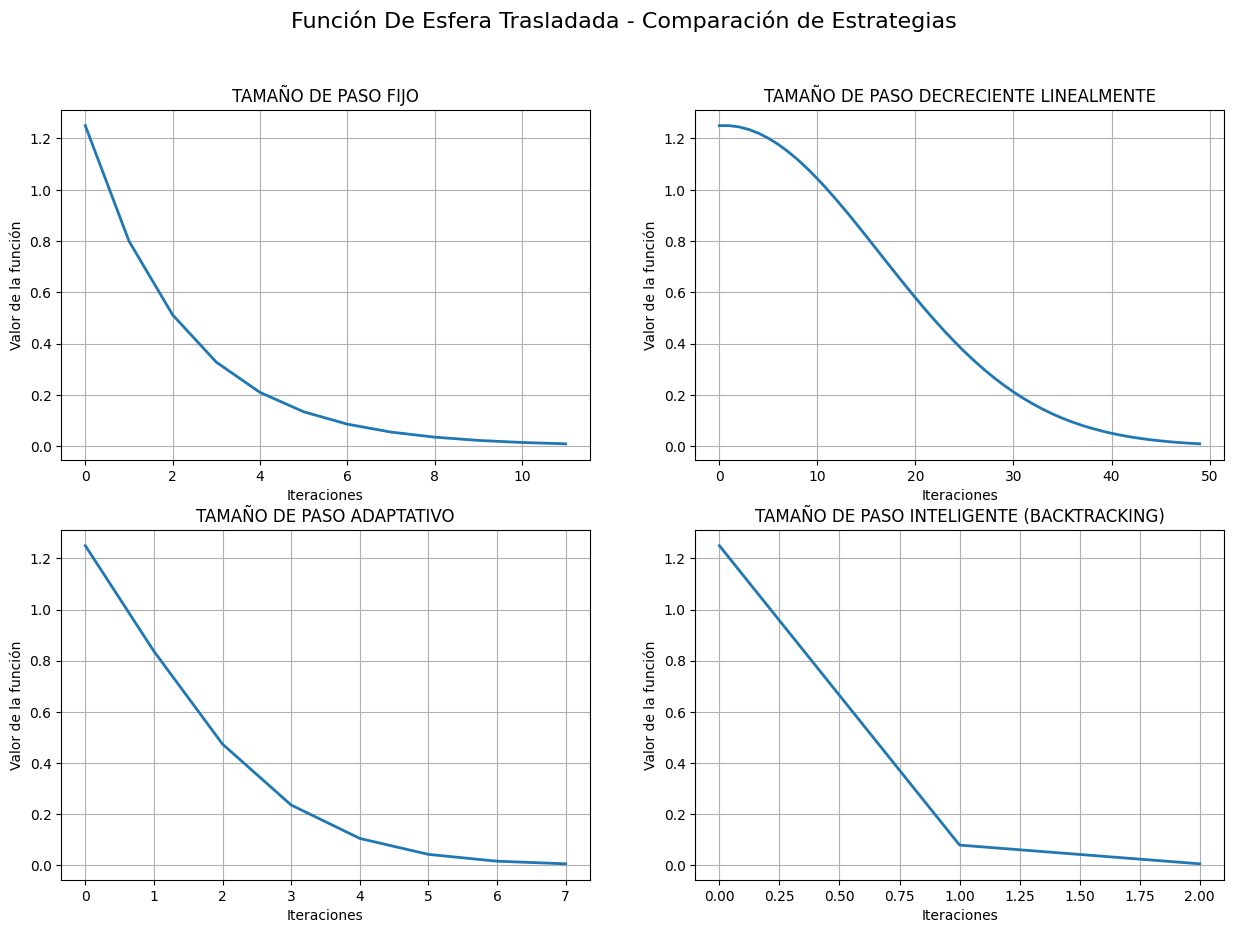

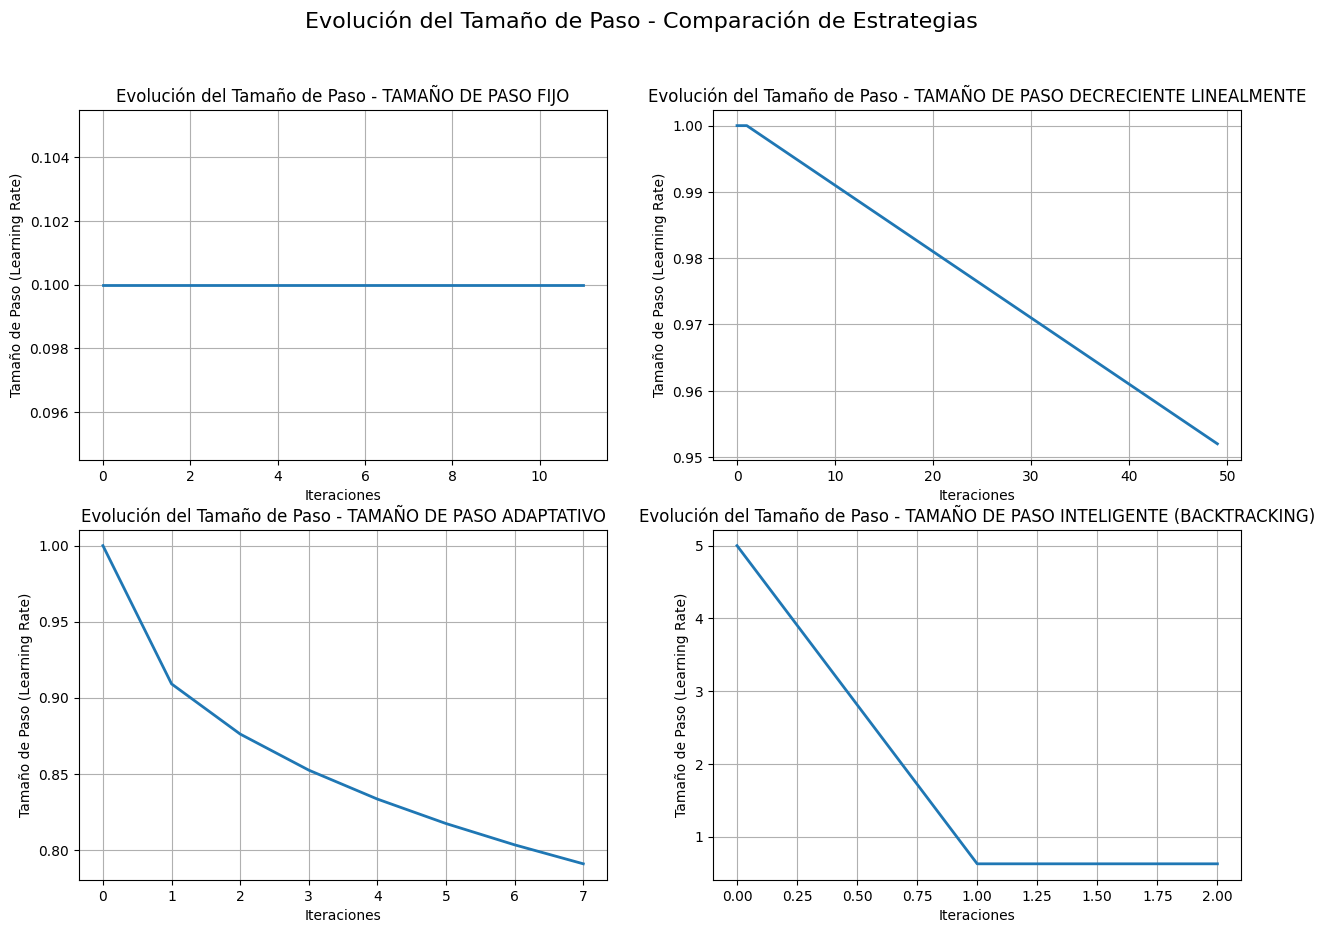

In [61]:
print("======= OPTIMIZACIÓN DE LA FUNCIÓN ESFERA TRASLADADA =======")

lr_strategies = {
    'fixed': 0.1, 
    'linear_decreasing': 1, 
    'adaptive': 1, 
    'intelligent': 5
}
lr_names = ["TAMAÑO DE PASO FIJO", 
            "TAMAÑO DE PASO DECRECIENTE LINEALMENTE",
            "TAMAÑO DE PASO ADAPTATIVO", 
            "TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)"]

trayectories = []
lr_histories = []

for schedule, lr, name in zip(lr_strategies.keys(), lr_strategies.values(), lr_names):
    x_sphere, trayectory_sphere, lr_history_sphere = sd_algorithm.optimize(
        func=translated_sphere,
        x0=x0,
        lr=lr,
        h=1e-5,
        max_iterations=1000,
        stop_value=1e-2,
        lr_schedule_type=schedule
    )
    trayectories.append(trayectory_sphere)
    lr_histories.append(lr_history_sphere)
    print("="*60)
    print(name)
    print("="*60)
    print("Valor óptimo encontrado:", x_sphere)
    print("Valor de la función en el óptimo:", translated_sphere(x_sphere))
    print("Número de iteraciones:", len(trayectory_sphere))

print("="*60)
print("Gráfica Descenso de la función:")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, history, name in zip(axs.flatten(), trayectories, lr_names):
    ax.plot(history, linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Valor de la función')
    ax.grid(True)

plt.suptitle('Función De Esfera Trasladada - Comparación de Estrategias', fontsize=16)
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for ax, lr_history, name in zip(axs.flatten(), lr_histories, lr_names):
    ax.plot(lr_history, linewidth=2)
    ax.set_title(f"Evolución del Tamaño de Paso - {name}")
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Tamaño de Paso (Learning Rate)')
    ax.grid(True)
plt.suptitle('Evolución del Tamaño de Paso - Comparación de Estrategias', fontsize=16)
plt.show()

======= OPTIMIZACIÓN DE LA FUNCIÓN DE ROSENBROCK =======
TAMAÑO DE PASO FIJO
Valor óptimo encontrado: [0.96540522 0.93190533 0.86818219 0.75313827 0.56580043]
Valor de la función en el óptimo: 0.0843953967473511
Número de iteraciones: 1000
TAMAÑO DE PASO DECRECIENTE LINEALMENTE
Valor óptimo encontrado: [0.94309258 0.8893002  0.79051968 0.62409813 0.38725818]
Valor de la función en el óptimo: 0.201259543292264
Número de iteraciones: 1000
TAMAÑO DE PASO ADAPTATIVO
Valor óptimo encontrado: [0.93085824 0.86638196 0.75029242 0.56208216 0.31333059]
Valor de la función en el óptimo: 0.2775245484202695
Número de iteraciones: 1000
TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)
Valor óptimo encontrado: [0.98163202 0.9637258  0.92834617 0.8616938  0.74166391]
Valor de la función en el óptimo: 0.02600977389485091
Número de iteraciones: 1000
Gráfica Descenso de la función:


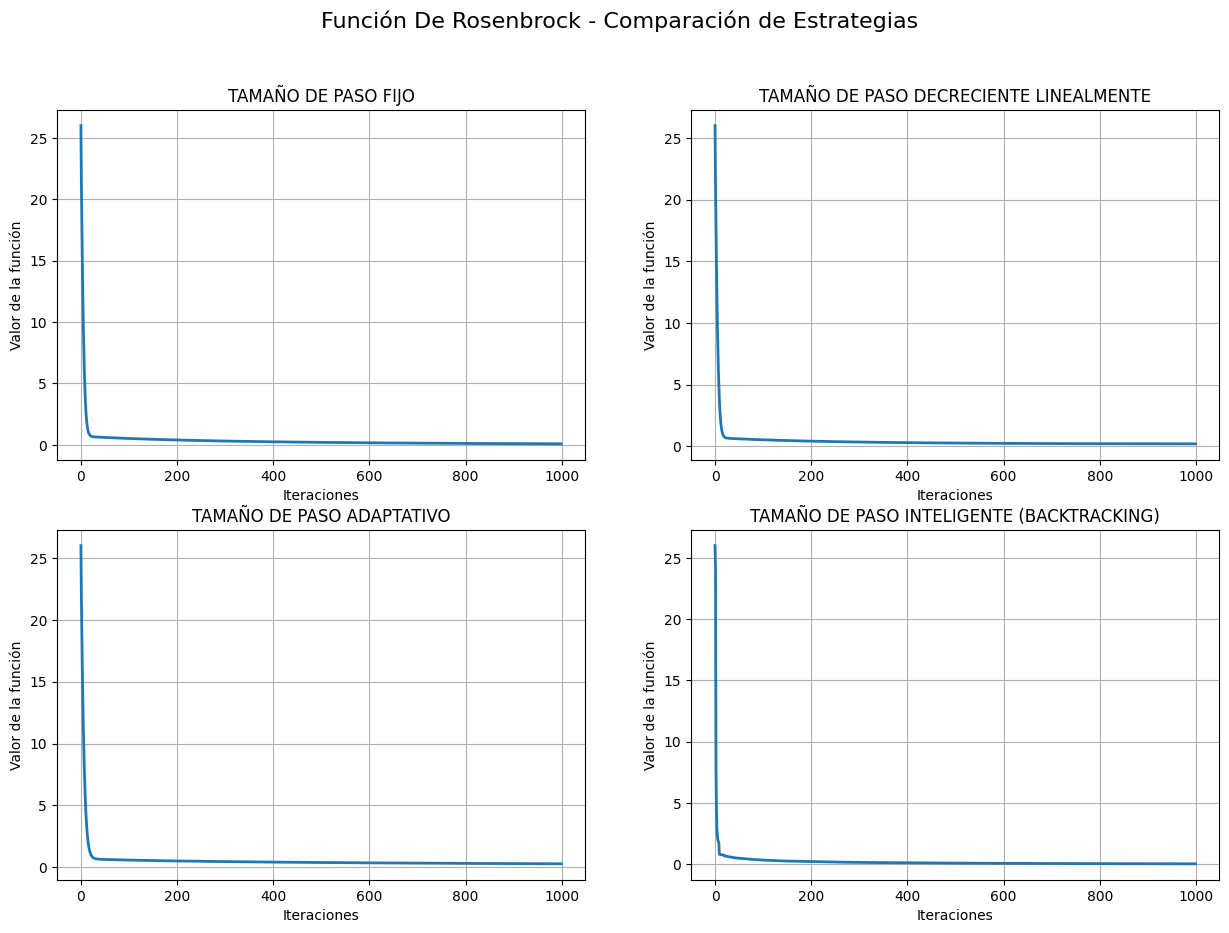

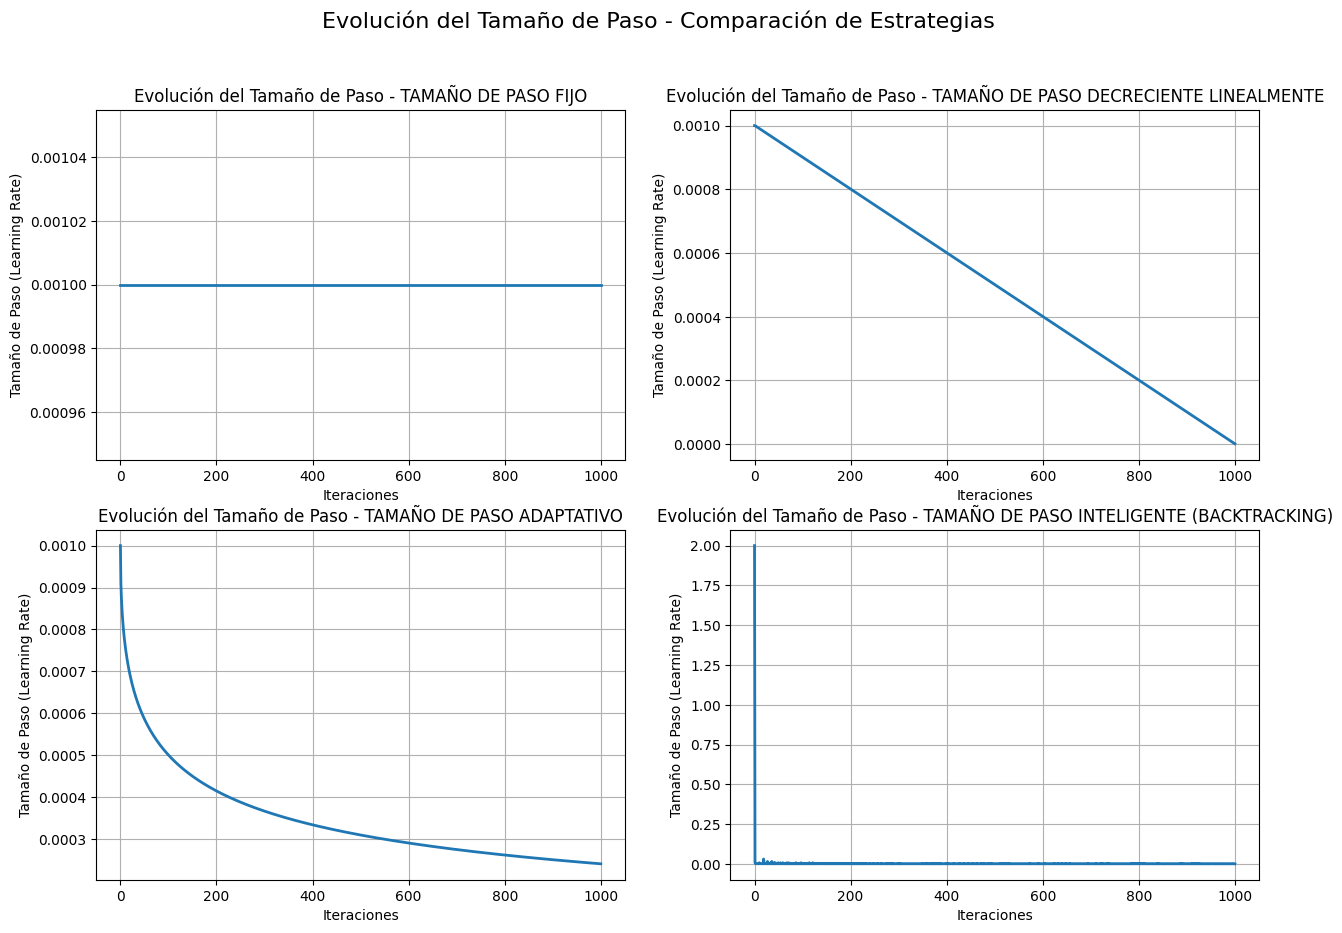

In [62]:
print("======= OPTIMIZACIÓN DE LA FUNCIÓN DE ROSENBROCK =======")

lr_strategies = {
    'fixed': 0.001, 
    'linear_decreasing': 0.001, 
    'adaptive': 0.001, 
    'intelligent': 2
}
lr_names = ["TAMAÑO DE PASO FIJO", 
            "TAMAÑO DE PASO DECRECIENTE LINEALMENTE",
            "TAMAÑO DE PASO ADAPTATIVO", 
            "TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)"]

trayectories = []
lr_histories = []

for schedule, lr, name in zip(lr_strategies.keys(), lr_strategies.values(), lr_names):
    x_rosenbrock, trayectory_rosenbrock, lr_history_rosenbrock = sd_algorithm.optimize(
        func=rosenbrock,
        x0=x0,
        lr=lr,
        h=1e-5,
        max_iterations=1000,
        stop_value=1e-2,
        lr_schedule_type=schedule
    )
    trayectories.append(trayectory_rosenbrock)
    lr_histories.append(lr_history_rosenbrock)
    print("="*60)
    print(name)
    print("="*60)
    print("Valor óptimo encontrado:", x_rosenbrock)
    print("Valor de la función en el óptimo:", rosenbrock(x_rosenbrock))
    print("Número de iteraciones:", len(trayectory_rosenbrock))

print("="*60)
print("Gráfica Descenso de la función:")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, history, name in zip(axs.flatten(), trayectories, lr_names):
    ax.plot(history, linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Valor de la función')
    ax.grid(True)

plt.suptitle('Función De Rosenbrock - Comparación de Estrategias', fontsize=16)
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for ax, lr_history, name in zip(axs.flatten(), lr_histories, lr_names):
    ax.plot(lr_history, linewidth=2)
    ax.set_title(f"Evolución del Tamaño de Paso - {name}")
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Tamaño de Paso (Learning Rate)')
    ax.grid(True)

plt.suptitle('Evolución del Tamaño de Paso - Comparación de Estrategias', fontsize=16)
plt.show()

======= OPTIMIZACIÓN DE LA FUNCIÓN DE PERM =======
TAMAÑO DE PASO FIJO
Valor óptimo encontrado: [0.37373353 0.92394664 0.28423641 0.23925204 0.23396527]
Valor de la función en el óptimo: 0.009998061571719667
Número de iteraciones: 935
TAMAÑO DE PASO DECRECIENTE LINEALMENTE
Valor óptimo encontrado: [0.41912372 0.920885   0.31263707 0.22632556 0.20960849]
Valor de la función en el óptimo: 0.018961822601823032
Número de iteraciones: 1000
TAMAÑO DE PASO ADAPTATIVO
Valor óptimo encontrado: [0.44660679 0.91758339 0.33863209 0.21764715 0.18936633]
Valor de la función en el óptimo: 0.03200556450289099
Número de iteraciones: 1000
TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)
Valor óptimo encontrado: [0.98437538 0.58679837 0.24590391 0.23101463 0.23072681]
Valor de la función en el óptimo: 0.009795331304480891
Número de iteraciones: 149
Gráfica Descenso de la función:


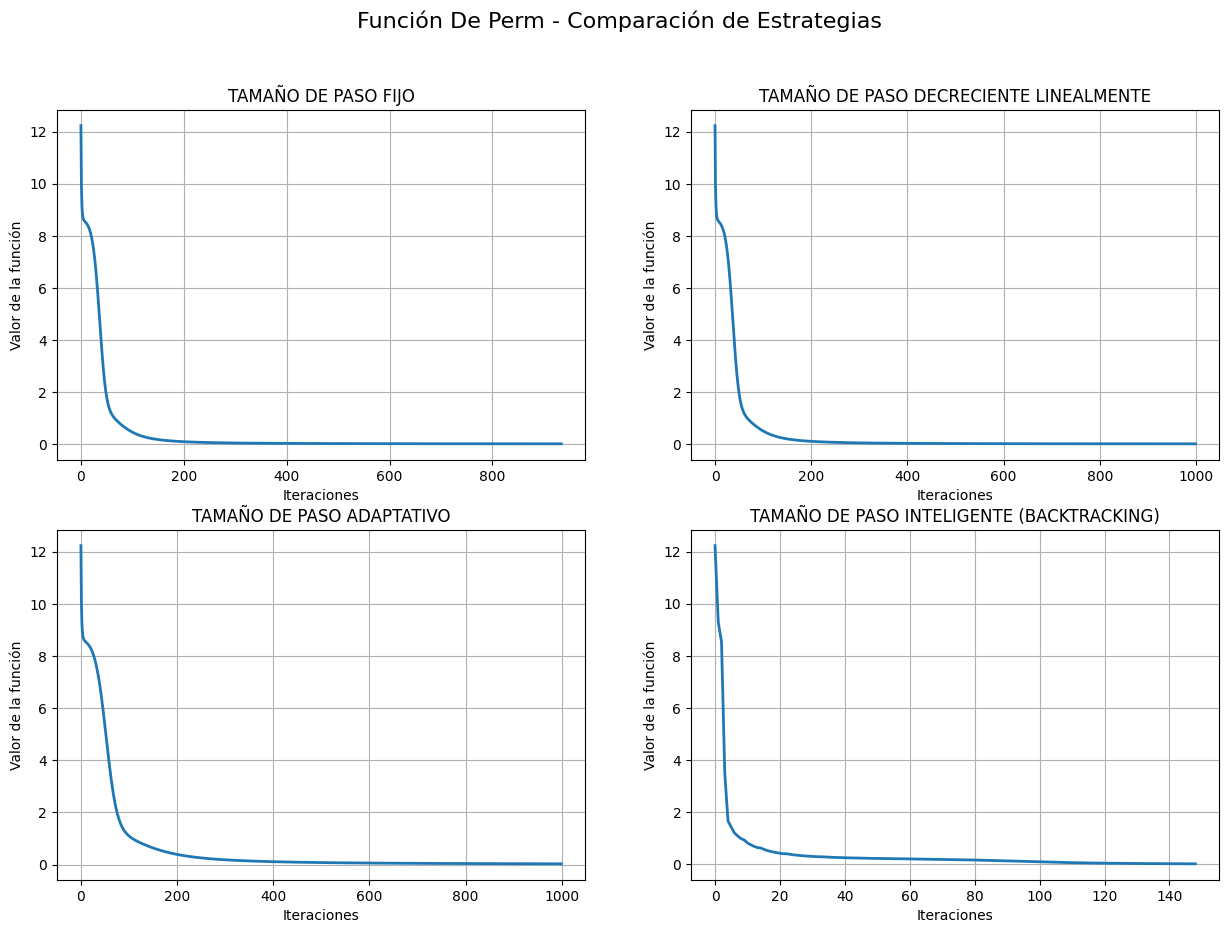

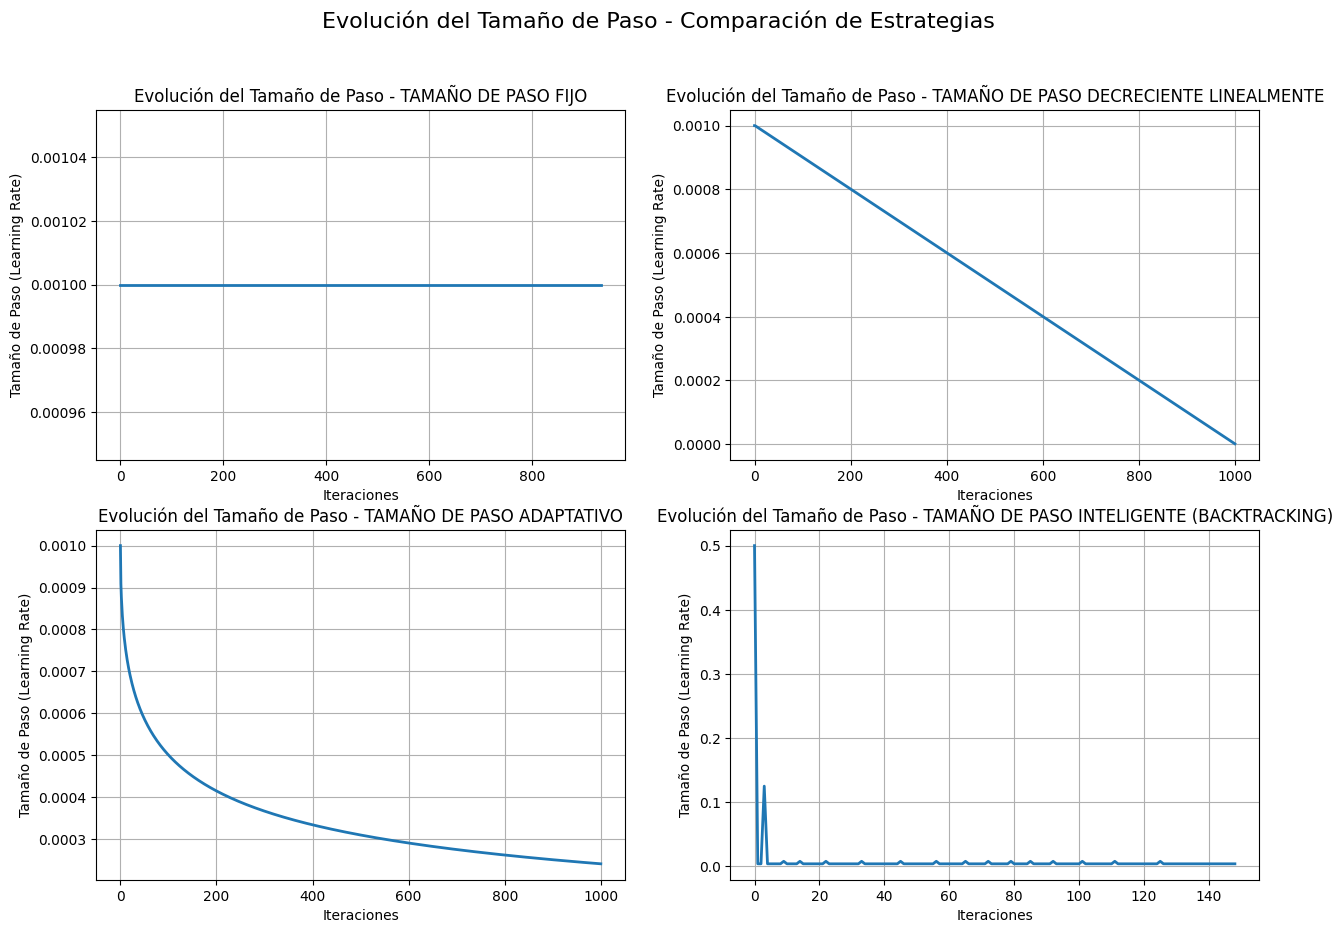

In [63]:
print("======= OPTIMIZACIÓN DE LA FUNCIÓN DE PERM =======")

lr_strategies = {
    'fixed': 0.001, 
    'linear_decreasing': 0.001, 
    'adaptive': 0.001, 
    'intelligent': 0.5
}
lr_names = ["TAMAÑO DE PASO FIJO", 
            "TAMAÑO DE PASO DECRECIENTE LINEALMENTE",
            "TAMAÑO DE PASO ADAPTATIVO", 
            "TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)"]

trayectories = []
lr_histories = []

for schedule, lr, name in zip(lr_strategies.keys(), lr_strategies.values(), lr_names):
    x_perm, trayectory_perm, lr_history_perm = sd_algorithm.optimize(
        func=perm,
        x0=x0,
        lr=lr,
        h=1e-5,
        max_iterations=1000,
        stop_value=1e-2,
        lr_schedule_type=schedule
    )
    trayectories.append(trayectory_perm)
    lr_histories.append(lr_history_perm)
    print("="*60)
    print(name)
    print("="*60)
    print("Valor óptimo encontrado:", x_perm)
    print("Valor de la función en el óptimo:", perm(x_perm))
    print("Número de iteraciones:", len(trayectory_perm))

print("="*60)
print("Gráfica Descenso de la función:")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, history, name in zip(axs.flatten(), trayectories, lr_names):
    ax.plot(history, linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Valor de la función')
    ax.grid(True)

plt.suptitle('Función De Perm - Comparación de Estrategias', fontsize=16)
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for ax, lr_history, name in zip(axs.flatten(), lr_histories, lr_names):
    ax.plot(lr_history, linewidth=2)
    ax.set_title(f"Evolución del Tamaño de Paso - {name}")
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Tamaño de Paso (Learning Rate)')
    ax.grid(True)

plt.suptitle('Evolución del Tamaño de Paso - Comparación de Estrategias', fontsize=16)
plt.show()